In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
train_data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [4]:
train_data.tail()

,qid,question_text,target
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0
1306121,ffffed09fedb5088744a,Who wins in a battle between a Wolverine and a...,0


In [5]:
test_data.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [6]:
test_data.tail()

,qid,question_text
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?
375805,fffff85473f4699474b0,Climate change is a worrying topic. How much t...


In [7]:
#To implement a bag of word classification, change data format to be useable with a classifier
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer

In [8]:
#Remove punctuation, stop words, convert text to lower case and stem words or lemmatize
#create stemmer
stemmer=PorterStemmer()

def stem_tokens(tokens,stemmer):
    stemmed=[stemmer.stem(items) for items in tokens ]
    return (stemmed)


In [9]:
#Now we have our tokenizer which remove non letters and stems words.

def tokenize(text):
    text=re.sub("[^a-zA-Z]"," ",text)
    tokens=nltk.word_tokenize(text)
    stems=stem_tokens(tokens,stemmer)
    return (stems)

In [10]:
vectorizer=CountVectorizer(
          analyzer='word',
          tokenizer=tokenize,
          lowercase=True,
          stop_words='english',
          max_features=85)


In [11]:
#Next, use the fit_transform() method to transform data into vector
#Concatenate all of training and test data since the input needed is a list of strings

features=vectorizer.fit_transform(train_data.question_text.tolist() + test_data.question_text.tolist() )

c:\program files\python37\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'sto

In [12]:
#Convert this feature into nd_array for easy use

In [13]:
features_nd=features.toarray()

In [14]:
#Now will use classifier to classify labels
#First will split Training and Test data to easy classify
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train,Y_test = train_test_split(features_nd[0:len(train_data)],
                                 train_data.target,
                                 train_size=0.85,
                                 random_state=1234)


In [15]:
#Now ready to train our classifier 
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()


In [16]:
log_model=model.fit(X_train,Y_train)

In [17]:
#Now will predict class label for test data
y_prediction=log_model.predict(X_test)

In [18]:
y_prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
#Now will find accuracy of our model
from sklearn.metrics import classification_report
print(classification_report(y_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    193244
           1       0.13      0.57      0.21      2675

    accuracy                           0.94    195919
   macro avg       0.56      0.76      0.59    195919
weighted avg       0.98      0.94      0.96    195919



In [20]:
#Finally, re train model with all the training data and use it
#for sentiment classification with the original unlabeled test set.
model1=LogisticRegression()
log1_model=model1.fit(features_nd[0:len(train_data)],train_data.target)
test_prediction=log_model.predict(features_nd[len(train_data):])



In [21]:
test_prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
test_data['Prediction']=test_prediction

In [23]:
test_data.tail(15)

,qid,question_text,Prediction
375791,fffd9600a2a09be911aa,Do we have any other source apart from Control...,0
375792,fffd9984aa992bb5dc59,What are some example of bad parenting and its...,0
375793,fffe18f21e5e070e55de,What would you like DC to do to make their mov...,0
375794,fffe22b68a6853b5b790,Why are Mexican people always in relationships...,1
375795,fffe408457ee7aabb690,"Wheat a person texts us on WhatsApp, why do th...",0
375796,fffe49a6831dacba5b55,Why should one prefer MI band over a normal wa...,0
375797,fffe4dd6bb7fd8fc1924,Do you think our system is fair? Consider fact...,0
375798,fffe7f11eb04763ddf91,Is it really difficult to get accepted to Ivy ...,0
375799,fffed08be2626f74b139,Why do all the stupid people I know tend to be...,0
375800,ffff4202a8b819a470c5,How can I prepare for JEE Mains 2018 if I star...,0


In [24]:
test_data.loc[375794]

qid                                           fffe22b68a6853b5b790
question_text    Why are Mexican people always in relationships...
Prediction                                                       1
Name: 375794, dtype: object

In [37]:
import random
spl = random.sample(range(len(test_prediction)), 15)
for text, sentiment in zip(test_data.question_text[spl], test_prediction[spl]):
    print(sentiment, text)

0 Why do we have two eye for vision and not just one?
0 I am so depressed from failures in neet and no family support. Should I take a third drop or take admission in B Pharma course?
0 What other jobs can copywriters do?
0 Every site says that if someone really likes you, they look at you in your eyes while talking. If they don't, couldn't they just be shy?
0 If your 50,000 feet in an F-14 Tomcat, how does the air mask work?
0 Why do many Quorans equivocate when commenting in posts where the author justifies pedophilic or incestuous behavior?
0 How much would you rate Quora on a scale from 1 to 10 based on its usefulness, easy to use and popularity?
0 Is it ideal to mix funny, sad and angry moments into a film?
0 What are some confessions you have as an Amazon Employee?
0 How do I get rid of Pimples Causing by masturbation?
0 How long before the HK property market crashes?
0 What are some good home remedies for removing cat urine smell?
0 What is biochemical energetics?
0 What is ulth

In [27]:
Negative_reviews=test_data[test_data['Prediction']==1]

In [28]:
Positive_reviews=test_data[test_data['Prediction']==0]

In [29]:
print('Total Question to classify: '+ str(len(test_data)))
print("Sincere Questions: " + str(len(Positive_reviews)))
print("Insincere Questions: "+ str(len(Negative_reviews)))

Total Question to classify: 375806
Sincere Questions: 370727
Insincere Questions: 5079


In [30]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

per_positive=len(Positive_reviews)*100/len(test_data['Prediction'])
per_negative=len(Negative_reviews)*100/len(test_data['Prediction'])


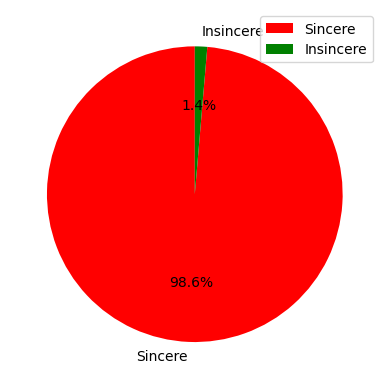

In [31]:
percentage=[per_positive,per_negative]
activities=['Sincere','Insincere']
colors=['r','g']
plt.pie(percentage,labels=activities,colors=colors,startangle=90,autopct='%.1f%%',shadow=False)
plt.legend(activities,loc='best')
plt.show()

In [38]:
#test_data.to_csv('submission.csv',index=False)